In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
benin_df = pd.read_csv("../data/processed/benin-malanville_clean.csv")
sierra_leone_df = pd.read_csv("../data/processed/sierraleone-bumbuna_clean.csv")
togo_df = pd.read_csv("../data/processed/togo_dapaong_qc_clean.csv")
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])
combined_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8548\2957345006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=combined_df, palette='Set2')
C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8548\2957345006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', data=combined_df, palette='Set2')
C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8548\2957345006.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DHI', data=combined_df, palette='Set2')


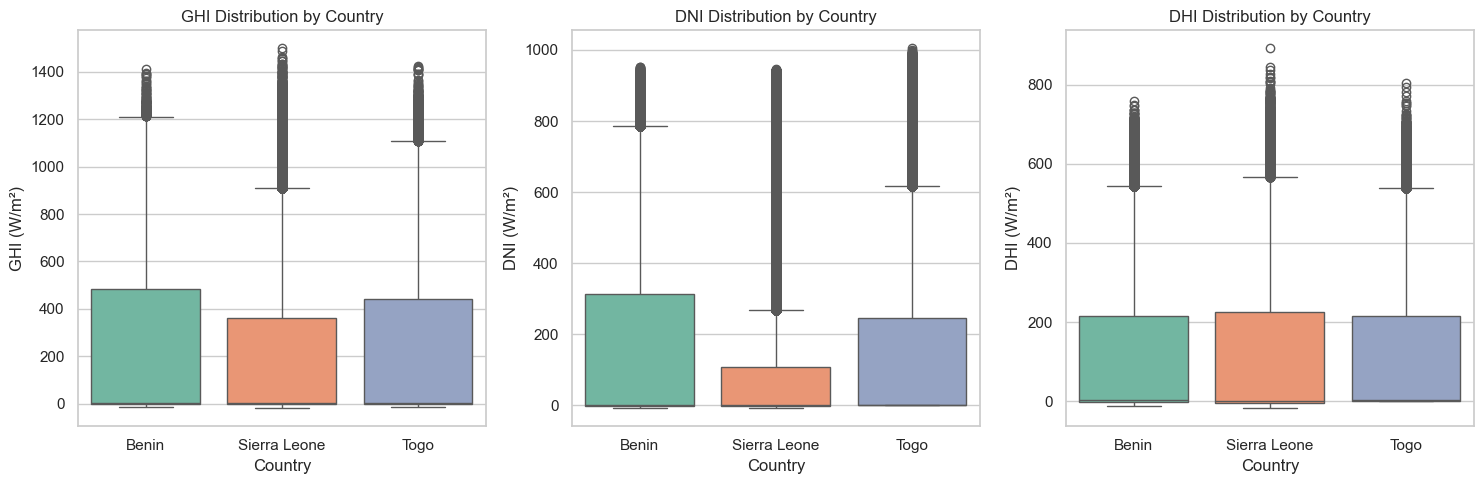

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Country', y='GHI', data=combined_df, palette='Set2')
plt.title('GHI Distribution by Country')
plt.xlabel('Country')
plt.ylabel('GHI (W/m²)')

plt.subplot(1, 3, 2)
sns.boxplot(x='Country', y='DNI', data=combined_df, palette='Set2')
plt.title('DNI Distribution by Country')
plt.xlabel('Country')
plt.ylabel('DNI (W/m²)')

plt.subplot(1, 3, 3)
sns.boxplot(x='Country', y='DHI', data=combined_df, palette='Set2')
plt.title('DHI Distribution by Country')
plt.xlabel('Country')
plt.ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

In [11]:
summary_stats = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
summary_stats = summary_stats.reset_index()

print("Summary Table of GHI, DNI, DHI Across Countries:")
display(summary_stats)

Summary Table of GHI, DNI, DHI Across Countries:


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.56,1.8,331.13,167.19,-0.1,261.71,115.36,1.6,158.69
1,Sierra Leone,201.96,0.3,298.50,116.38,-0.1,218.65,113.72,-0.1,158.95
2,Togo,230.56,2.1,322.53,151.26,0.0,250.96,116.44,2.5,156.52


In [12]:
ghi_benin = combined_df[combined_df['Country'] == 'Benin']['GHI']
ghi_sierra_leone = combined_df[combined_df['Country'] == 'Sierra Leone']['GHI']
ghi_togo = combined_df[combined_df['Country'] == 'Togo']['GHI']

f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)

print(f"One-Way ANOVA on GHI:")
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

One-Way ANOVA on GHI:
F-Statistic: 2090.09
P-Value: 0.0000


# Key Observations
- **Solar Potential**: Based on the boxplots, Benin appears to have the highest median GHI, suggesting greater solar potential, while Sierra Leone (Bumbuna) shows the lowest.
- **Variability**: Benin (Malanville) exhibits the greatest variability in DNI, with a wider interquartile range, indicating less consistent direct solar radiation.
- **Statistical Significance**: The ANOVA p-value (<0.05) indicates significant differences in GHI across countries, supporting the observed trends in the boxplots.

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8548\1273488399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='GHI', data=avg_ghi.reset_index(), palette='Blues_d')


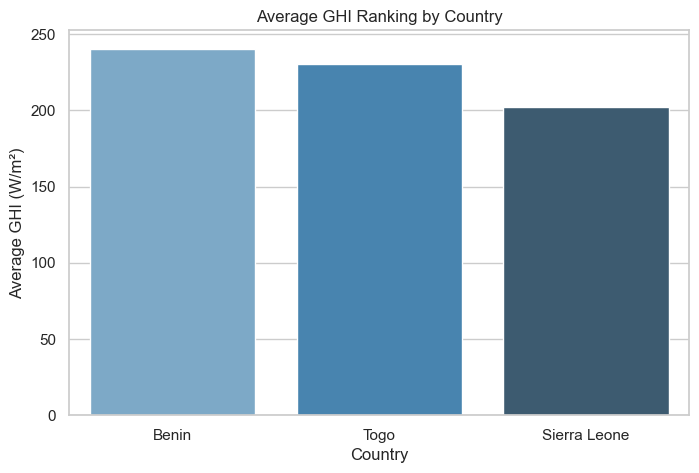

In [13]:

avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Country', y='GHI', data=avg_ghi.reset_index(), palette='Blues_d')
plt.title('Average GHI Ranking by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()